In [1]:
import numpy as np
import matplotlib.pyplot as plt
from odetools import RK3, Cancer
from scipy import integrate

# Постановка задачи. 

Клетки опухоли содержат особые вещества (антигены), которые вызывают резкую иммунную реакцию у больного. Эта реакция состоит в том, что
производятся клетки - лимфоциты, которые атакуют и уничтожают клетки опухоли. Модель оперирует следующими переменными (имеется в виду плотность названной популяции
клеток):

- $B$ - свободные лимфоциты на поверхности опухоли
- $C$ - опухолевые клетки внутри опухоли и на ее поверхности
- $C_S$ - опухолевые клетки на поверхности опухоли
- $C_N$ - опухолевые клетки на поверхности опухоли, не связанные лимфоцитами
- $C_F$ - опухолевые клетки внутри и на поверхности опухоли, не связанные лимфоцитами

Переменные B и C можно взять за основные переменные модели, которая имеет следующий
вид:

$$
    \begin{gathered}
        C' = (-\lambda_1 + \alpha_1 C_N (1 - B/B_M))\\
        B' = \lambda_2 C_F  - \alpha_2 C_N B
    \end{gathered}
$$

Здесь $\lambda_1$ характеризует уровень естественной смертности лимфоцитов, следующее слагаемое
- их стимуляцию: когда B мало, стимуляция свободных лимфоцитов возрастает линейно с
ростом $C_N$ и что существует максимальный размер популяции $B_M$, при котором стимуляция обращается в нуль. Первое слагаемое во втором уравнении описывает рост опухоли, не подвергающейся атакам лимфоцитов, а второй член учитывает взаимодействие свободных лимфоцитов с опухолевыми клетками на поверхности опухоли. Подставляя в уравнения значения $K_1 = C^{2/3}/(1+K_2 B)$, $C_F = C - K_1 K_2 B C^{2/3}/(1 + K_2 B)$, можно переписать их в
виде
$$
    \begin{gathered} 
        x' = (-\lambda_1 + \beta_1 y^{2/3}(1 - x/c)(1 + x))x\\
        y' = \lambda_2 y + \beta_2 x y^{2/3}/(1 + x)
    \end{gathered}    
$$


где $x = K_2B$, $c = K_2B_M$, $y = K_1C$, а $\lambda_1$, $\lambda_2$, $\lambda_1$, $\lambda_2$ положительные параметры. Так как $x$ и $y$ - размеры популяций, они должны быть неотрицательными, а x не может превышать $c$,
поскольку B ограничено сверху величиной $B_M$. Уравнения дополняются начальными условиям:
$$
    x(0) = x_0, \ y(0) = y_0
$$

# Задание

- Составить программу интегрирования задачи Коши для системы из n уравнений первого порядка вида

$$
    y' = f(t, y), y(0) = y_0, y(t) \in \mathbb{R}
$$ 
на произвольном отрезке $[a, b]$, используя метод Рунге-Кутта 3-го порядка точности с постоянным шагом h.
- Для значений параметра $\beta_2$ = 3; 3.48; 5 при помощи разработанной процедуры расcчитать динамику популяции при различных начальных значениях размера опухоли $y_0 \in [0.5, 9]$. Привести графики наиболее характерных решений в координатах $(x, y)$ и дать их интерпретацию. Параметры: $\lambda_1 = \lambda_2 = 1$, $\lambda_1 = 1$, $c = 3$, $t \in [0, 20]$.

# Теоретические сведения
Пусть заданая нормальная система ОДУ $y' = f(t, y)$ и начальные условия $y(t_0) = y_0$.

Метод Рунге-Кутта 3 порядка с постоянным шагом $h$ задается следующими соотношениями:

$k_1 = hf(t_n, y_n)$

$k_2 = hf(t_n+\frac{1}{2}h, y_n+\frac{1}{2}k_1$

$k_3 = hf(t_n+h, y_n - k_1 + 2k_2)$ 

$y_{n+1} = y_n + \frac{1}{6}(k_1 + 4k_2 + k_3)$

Количество стадий у метода Рунге-Кутты совпадает с его порядком $O(h^3)$

# Решение системы ДУ при различных начальных условиях и значении параметра $\beta_2$

In [2]:
Y = []
BETA2 = [3, 3.48, 5]
Y0 = [0.6, 0.75, 0.8]
for beta in BETA2:
    subY = []
    for y0 in Y0:
        time, y = RK3(Cancer(beta2=beta), 
                    init_value=np.array([0.6, y0]), 
                    interval=(0, 20),
                    variative_step=False)
        subY.append(y)
    Y.append(subY)

/Users/zhursvlevy/Desktop/методы вычислений/ЧМРЗТУ/runge-kutta/odetools.py:20: RuntimeWarning: invalid value encountered in double_scalars
  dX0 = (-self.l1 + self.beta1 * X[1] ** (2./3) * (1 - X[0]/self.c) * (1 + X[0])) * X[0]
/Users/zhursvlevy/Desktop/методы вычислений/ЧМРЗТУ/runge-kutta/odetools.py:21: RuntimeWarning: invalid value encountered in double_scalars
  dX1 = self.l2 * X[1] - self.beta2 * X[0] * X[1]**(2./3) / (1 + X[0])


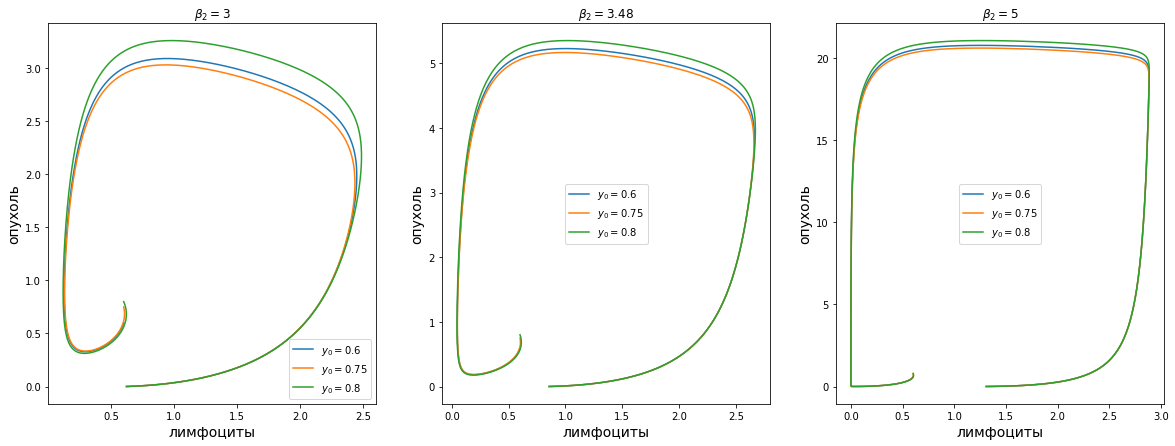

In [3]:
plt.figure(figsize=(20, 7))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    for (j, y0) in enumerate(Y0):
        plt.plot(*Y[i - 1][j], label=r'$y_0 = {}$'.format(y0))
   
    plt.xlabel('лимфоциты', fontsize=14)
    plt.ylabel('опухоль', fontsize=14)
    plt.title(r'$\beta_2={}$'.format(BETA2[i - 1]))
    plt.legend()
# plt.savefig('/Users/zhursvlevy/Desktop/методы вычислений/ЧМРЗТУ/runge-kutta/report/RK3')

# Вывод

Исходя из первого графика можно сделать вывод, что при данном коэффициенте $\beta_2$ рост опухоли невозможно остановить. На последующих двух графиках видна прямая связь между ростом лимфоцитов и опухоли. При определенном количестве лимфоцитов опухоль начинает уменьшаться и достигает нулевого значения. С математической точки зрения можно отметить, что начальная точка является неустойчивым фокусом.

# Проверка решения стандартными функциями

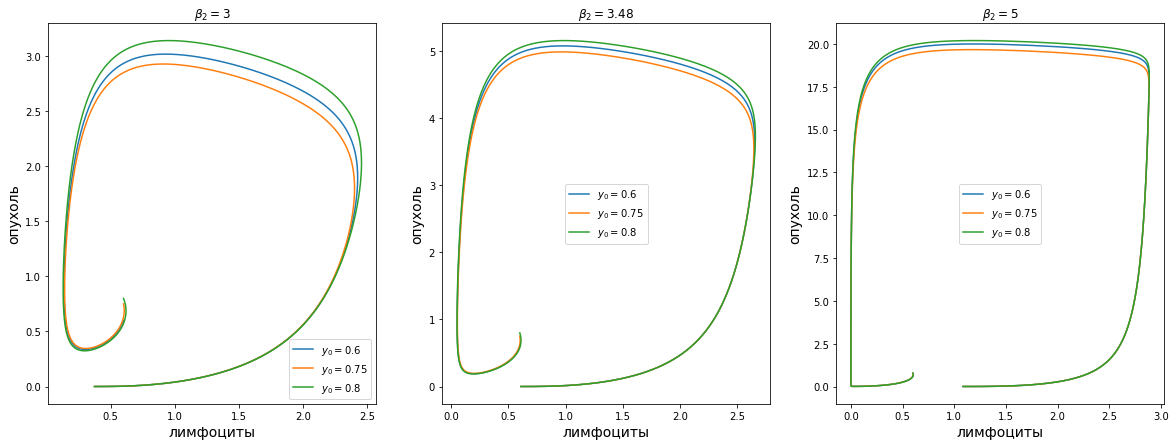

In [9]:
Y = []
BETA2 = [3, 3.48, 5]
Y0 = [0.6, 0.75, 0.8]
for beta in BETA2:
    subY = []
    for y0 in Y0:
        y = integrate.solve_ivp(Cancer(beta2=beta),  
                                      (0, 20),
                                      [0.6, y0],
                                      max_step=0.01)
        subY.append(y.y)
    Y.append(subY)
plt.figure(figsize=(20, 7))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    for (j, y0) in enumerate(Y0):
        plt.plot(*Y[i - 1][j], label=r'$y_0 = {}$'.format(y0))
   
    plt.xlabel('лимфоциты', fontsize=14)
    plt.ylabel('опухоль', fontsize=14)
    plt.title(r'$\beta_2={}$'.format(BETA2[i - 1]))
    plt.legend()